In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
df = pd.read_csv('../train.csv', parse_dates=['datetime'])
print(df.shape)
df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [14]:
df_train = df[['datetime','count']]
df_train = df_train.set_index('datetime')
ts = df_train['count']
ts.head()

datetime
2011-01-01 00:00:00    16
2011-01-01 01:00:00    40
2011-01-01 02:00:00    32
2011-01-01 03:00:00    13
2011-01-01 04:00:00     1
Name: count, dtype: int64

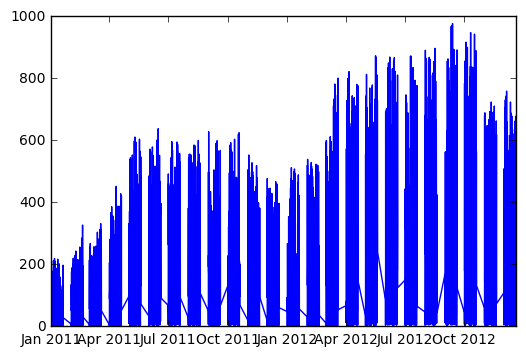

In [15]:
plt.plot(ts)

In [12]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


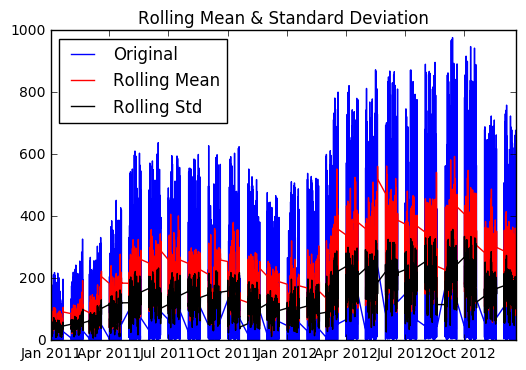

Results of Dickey-Fuller Test:
Test Statistic                -6.419976e+00
p-value                        1.801620e-08
#Lags Used                     3.600000e+01
Number of Observations Used    1.084900e+04
Critical Value (10%)          -2.566912e+00
Critical Value (5%)           -2.861806e+00
Critical Value (1%)           -3.430953e+00
dtype: float64


In [16]:
test_stationarity(ts)

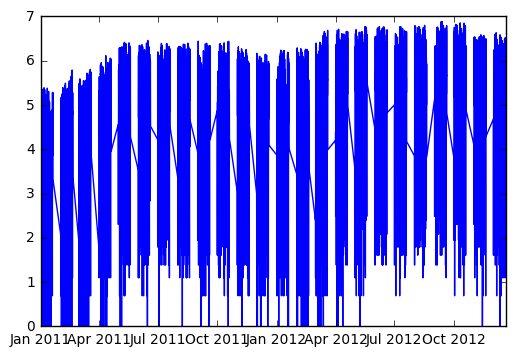

In [32]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  if __name__ == '__main__':


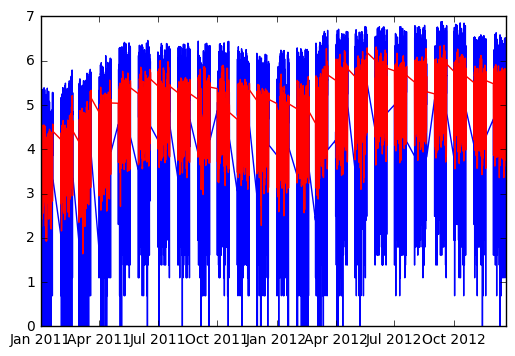

In [33]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [34]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

datetime
2011-01-01 00:00:00         NaN
2011-01-01 01:00:00         NaN
2011-01-01 02:00:00         NaN
2011-01-01 03:00:00         NaN
2011-01-01 04:00:00         NaN
2011-01-01 05:00:00         NaN
2011-01-01 06:00:00         NaN
2011-01-01 07:00:00         NaN
2011-01-01 08:00:00         NaN
2011-01-01 09:00:00         NaN
2011-01-01 10:00:00         NaN
2011-01-01 11:00:00    1.807745
Name: count, dtype: float64

C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


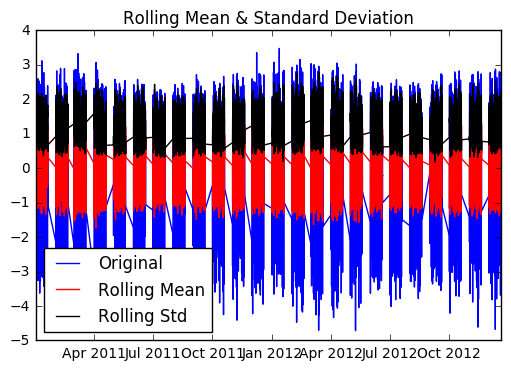

Results of Dickey-Fuller Test:
Test Statistic                   -24.166330
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10835.000000
Critical Value (10%)              -2.566912
Critical Value (5%)               -2.861807
Critical Value (1%)               -3.430954
dtype: float64


In [35]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(min_periods=0,halflife=12,ignore_na=False,adjust=True).mean()
  if __name__ == '__main__':


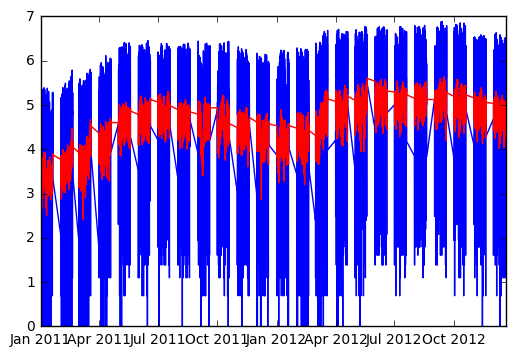

In [36]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


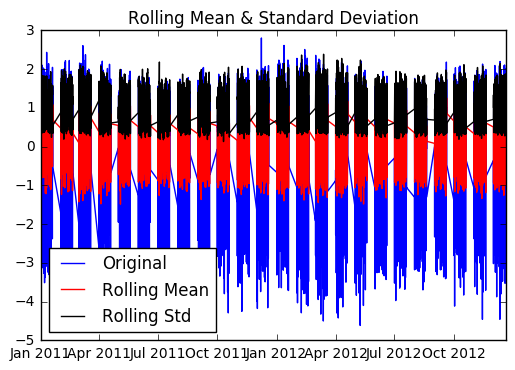

Results of Dickey-Fuller Test:
Test Statistic                   -21.456733
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10846.000000
Critical Value (10%)              -2.566912
Critical Value (5%)               -2.861807
Critical Value (1%)               -3.430953
dtype: float64


In [37]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

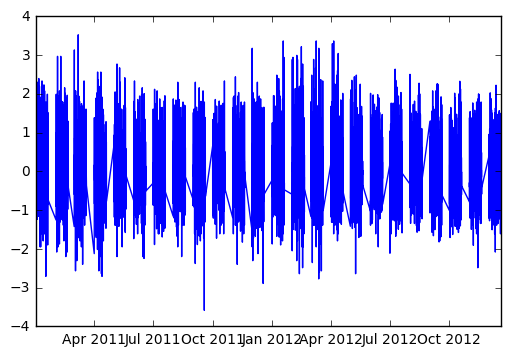

In [38]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\SirTime\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


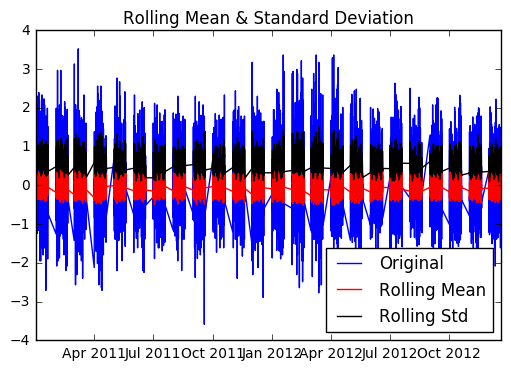

Results of Dickey-Fuller Test:
Test Statistic                   -22.930693
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10845.000000
Critical Value (10%)              -2.566912
Critical Value (5%)               -2.861807
Critical Value (1%)               -3.430953
dtype: float64


In [39]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [41]:
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ValueError: You must specify a freq or x must be a pandas object with a timeseries index

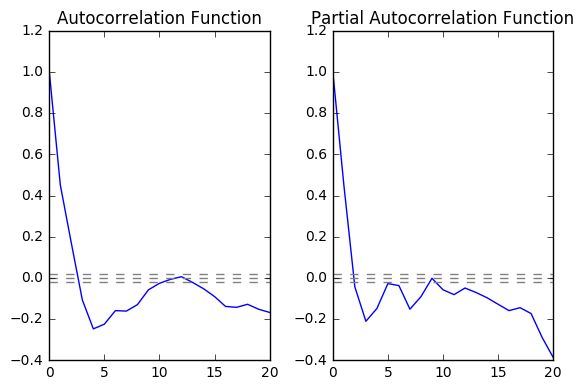

In [44]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

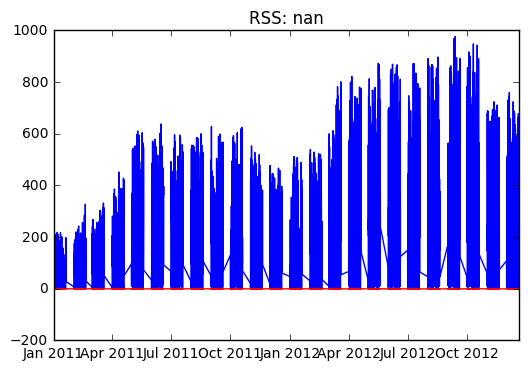

In [46]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts)**2))

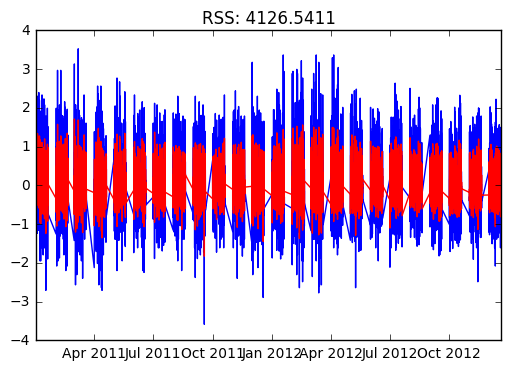

In [47]:
model = ARIMA(ts_log, order=(0, 1, 3))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

C:\Users\SirTime\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


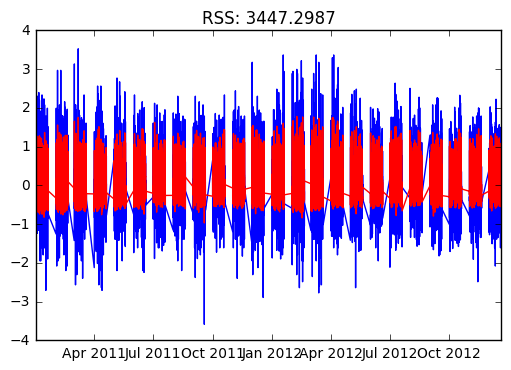

In [48]:
model = ARIMA(ts_log, order=(2, 1, 3))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [49]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

datetime
2011-01-01 01:00:00    0.000125
2011-01-01 02:00:00    0.415876
2011-01-01 03:00:00   -0.156175
2011-01-01 04:00:00   -0.642392
2011-01-01 05:00:00   -1.273416
dtype: float64

In [50]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

datetime
2011-01-01 01:00:00    0.000125
2011-01-01 02:00:00    0.416000
2011-01-01 03:00:00    0.259825
2011-01-01 04:00:00   -0.382568
2011-01-01 05:00:00   -1.655984
dtype: float64

In [51]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

datetime
2011-01-01 00:00:00    2.772589
2011-01-01 01:00:00    2.772713
2011-01-01 02:00:00    3.188589
2011-01-01 03:00:00    3.032414
2011-01-01 04:00:00    2.390021
dtype: float64

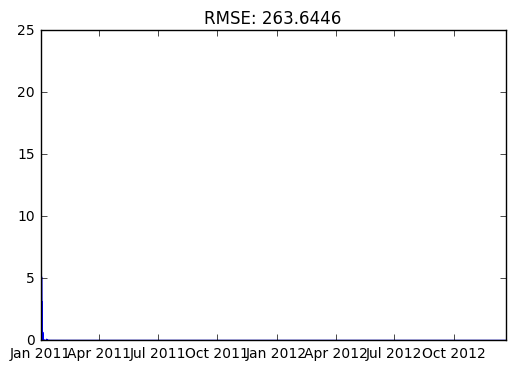

In [54]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
# plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [55]:
predictions_ARIMA

datetime
2011-01-01 00:00:00    1.600000e+01
2011-01-01 01:00:00    1.600199e+01
2011-01-01 02:00:00    2.425418e+01
2011-01-01 03:00:00    2.074725e+01
2011-01-01 04:00:00    1.091372e+01
2011-01-01 05:00:00    3.054467e+00
2011-01-01 06:00:00    2.842798e+00
2011-01-01 07:00:00    5.753858e+00
2011-01-01 08:00:00    9.356835e+00
2011-01-01 09:00:00    1.491299e+01
2011-01-01 10:00:00    1.903268e+01
2011-01-01 11:00:00    2.376274e+01
2011-01-01 12:00:00    2.308745e+01
2011-01-01 13:00:00    1.917435e+01
2011-01-01 14:00:00    1.384424e+01
2011-01-01 15:00:00    9.733555e+00
2011-01-01 16:00:00    6.764577e+00
2011-01-01 17:00:00    4.410399e+00
2011-01-01 18:00:00    2.769974e+00
2011-01-01 19:00:00    1.654402e+00
2011-01-01 20:00:00    1.360601e+00
2011-01-01 21:00:00    1.238521e+00
2011-01-01 22:00:00    1.084394e+00
2011-01-01 23:00:00    9.025280e-01
2011-01-02 00:00:00    9.104556e-01
2011-01-02 01:00:00    6.544863e-01
2011-01-02 02:00:00    5.821531e-01
2011-01-02 03:00:00